In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from pandas.tseries.offsets import DateOffset
import time
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [20]:
data = pd.read_csv("full_grouped.csv")
data.rename(columns={'New cases':'New_cases'},inplace=True)
data.rename(columns={'New deaths':'New_deaths'},inplace=True)
data.rename(columns={'New recovered':'New_recovered'},inplace=True)

df = pd.DataFrame()
df['Date'] = data.loc[data['Country/Region']=='Madagascar'].Date
df['Confirmé'] = data.loc[data['Country/Region']=='Madagascar'].New_cases
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df = df[58:]

In [21]:
df

,Confirmé
Date,
2020-03-20,3
2020-03-21,0
2020-03-22,0
2020-03-23,9
2020-03-24,5
...,...
2020-06-18,25
2020-06-19,40
2020-06-20,60


In [42]:
train,test = df[12:],df[-12:]
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [50]:
train.shape

(83, 1)

In [59]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train,train,length=n_input,batch_size=5)

model = Sequential()
model.add(LSTM(200,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam',metrics='accuracy',loss='mse')

model.fit_generator(generator,epochs=50)

Epoch 1/50
17/17 [==============================] - 1s 50ms/step - loss: 0.0559 - accuracy: 0.2169
Epoch 2/50
17/17 [==============================] - 1s 51ms/step - loss: 0.0303 - accuracy: 0.2169
Epoch 3/50
17/17 [==============================] - 1s 56ms/step - loss: 0.0291 - accuracy: 0.2169
Epoch 4/50
17/17 [==============================] - 1s 61ms/step - loss: 0.0242 - accuracy: 0.2169
Epoch 5/50
17/17 [==============================] - 1s 65ms/step - loss: 0.0265 - accuracy: 0.2169
Epoch 6/50
17/17 [==============================] - 1s 60ms/step - loss: 0.0284 - accuracy: 0.2169
Epoch 7/50
17/17 [==============================] - 1s 57ms/step - loss: 0.0271 - accuracy: 0.2169
Epoch 8/50
17/17 [==============================] - 1s 53ms/step - loss: 0.0236 - accuracy: 0.2169
Epoch 9/50
17/17 [==============================] - 1s 52ms/step - loss: 0.0242 - accuracy: 0.2169
Epoch 10/50
17/17 [==============================] - 1s 54ms/step - loss: 0.0265 - accuracy: 0.2169
Epoch 11/

In [60]:
pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [61]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index,columns=['Predictions'])
df_test = pd.concat([df,df_predict],axis=1)

In [62]:
df_test.tail(15)

,Confirmé,Predictions
Date,,
2020-06-08,42,NaN
2020-06-09,44,NaN
2020-06-10,24,NaN
2020-06-11,41,50.114991
2020-06-12,37,50.270894
2020-06-13,12,50.003761
2020-06-14,20,50.276970
2020-06-15,18,50.325994
2020-06-16,27,50.263139


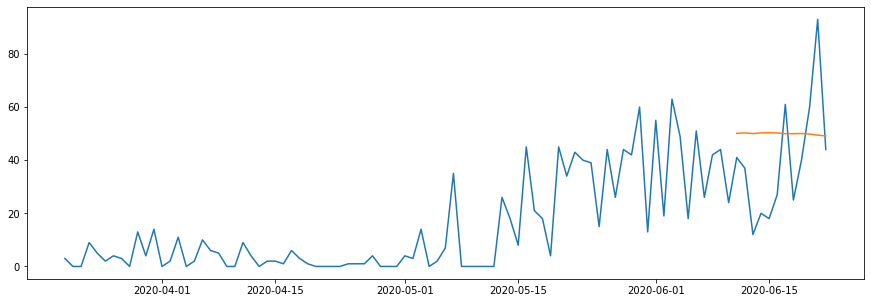

In [63]:
plt.figure(figsize=(15,5))
plt.plot(df_test.index,df_test['Confirmé'])
plt.plot(df_test.index,df_test['Predictions'])

In [65]:
train = df
scaler = MinMaxScaler()
scaler.fit(train)

train = scaler.transform(train)

n_input = 8
n_features = 1

generator = TimeseriesGenerator(train,train,length=n_input,batch_size=5)
model.fit_generator(generator,epochs=50)

pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

Epoch 1/50
18/18 [==============================] - 1s 32ms/step - loss: 0.0212 - accuracy: 0.2184
Epoch 2/50
18/18 [==============================] - 1s 48ms/step - loss: 0.0215 - accuracy: 0.2184
Epoch 3/50
18/18 [==============================] - 1s 64ms/step - loss: 0.0205 - accuracy: 0.2184
Epoch 4/50
18/18 [==============================] - 1s 40ms/step - loss: 0.0198 - accuracy: 0.2184
Epoch 5/50
18/18 [==============================] - 1s 42ms/step - loss: 0.0202 - accuracy: 0.2184
Epoch 6/50
18/18 [==============================] - 1s 38ms/step - loss: 0.0210 - accuracy: 0.2184
Epoch 7/50
18/18 [==============================] - 1s 45ms/step - loss: 0.0202 - accuracy: 0.2299
Epoch 8/50
18/18 [==============================] - 1s 34ms/step - loss: 0.0222 - accuracy: 0.2184
Epoch 9/50
18/18 [==============================] - 1s 44ms/step - loss: 0.0198 - accuracy: 0.2299
Epoch 10/50
18/18 [==============================] - 1s 54ms/step - loss: 0.0206 - accuracy: 0.2184
Epoch 11/

In [66]:
add_dates = [df.index[-1] + DateOffset(day=x)for x in range(22,31)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates.tail(30)

,Confirmé
2020-06-23,NaN
2020-06-24,NaN
2020-06-25,NaN
2020-06-26,NaN
2020-06-27,NaN
2020-06-28,NaN
2020-06-29,NaN
2020-06-30,NaN


In [69]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=future_dates[-n_input:].index,columns=['Predictions'])

df_future = pd.concat([df,df_predict],axis=1)
df_future.tail(20)

,Confirmé,Predictions
2020-06-11,41.0,NaN
2020-06-12,37.0,NaN
2020-06-13,12.0,NaN
2020-06-14,20.0,NaN
2020-06-15,18.0,NaN
2020-06-16,27.0,NaN
2020-06-17,61.0,NaN
2020-06-18,25.0,NaN
2020-06-19,40.0,NaN
2020-06-20,60.0,NaN


<BarContainer object of 103 artists>

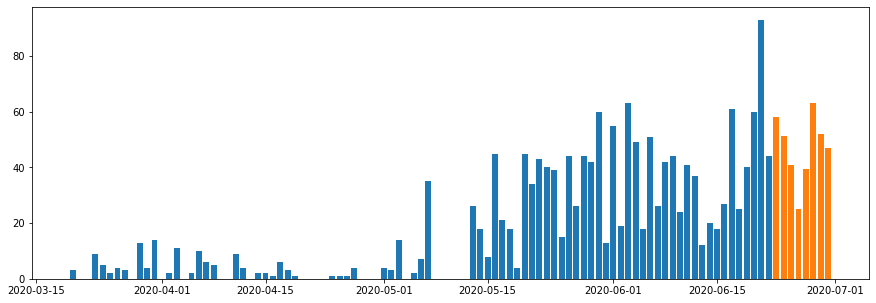

In [72]:
plt.figure(figsize=(15,5))
plt.bar(df_future.index,df_future['Confirmé'])
plt.bar(df_future.index,df_future['Predictions'])